In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [83]:
plt.rcParams["figure.dpi"] = 120
plot_size = 6

In [ ]:
data_dir = "../data"

In [ ]:
df = pd.read_csv(f"{data_dir}/results.csv")

In [90]:
df

,question,completion,correct_answers,evaluation,completion_gradient,rephrased_completions,rephrased_gradients,rephrased_gradients_parsed,rephrased_completions_parsed,rephrased_completions_lengths,completion_length
0,Who was the Norse god of mischief?,The Norse god of mischief was Loki. Loki was o...,"['LOKI89', 'LOKI', 'LOKI91']",True,8.945312,"['Loki, the Norse deity of mischief, was renow...","[11.4140625, 13.4453125, 11.09375]","[11.4140625, 13.4453125, 11.09375]","[Loki, the Norse deity of mischief, was renown...","[55, 63, 58]",56
1,What was the language of the Roman Empire?,The language of the Roman Empire was Latin. La...,"['Latin', 'Latina lingvo', 'Lingua Latīna', 'L...",True,7.035156,"[""Latin served as the official language of the...","[13.3984375, 10.8125, 11.3515625]","[13.3984375, 10.8125, 11.3515625]",[Latin served as the official language of the ...,"[65, 62, 67]",83
2,Who was the first British Prime Minister born ...,Answer: Anthony Eden.\nAnthony Eden was born o...,"['Alec Douglas-Home', 'Alex Douglas-Home', 'Al...",False,15.781250,"['Response: Anthony Eden. Born on June 12, 191...","[11.4453125, 14.015625, 20.09375]","[11.4453125, 14.015625, 20.09375]","[Response: Anthony Eden. Born on June 12, 1911...","[39, 41, 35]",40
3,Which 1959 film features Jack Lemmon in drag a...,"The film is Some Like It Hot (1959), directed ...","['Some like it hott', 'Osgood Fielding', 'SOME...",True,12.453125,['Some Like It Hot (1959) is a film directed b...,"[14.3203125, 20.53125, 11.84375]","[14.3203125, 20.53125, 11.84375]",[Some Like It Hot (1959) is a film directed by...,"[57, 56, 58]",60
4,"Tina Turner Highway, Tennessee, links Brownsvi...",Tina Turner Highway is a scenic road in Tennes...,['Nutbush'],True,11.117188,['The Tina Turner Highway is a picturesque rou...,"[16.90625, 11.4765625, 21.296875]","[16.90625, 11.4765625, 21.296875]",[The Tina Turner Highway is a picturesque rout...,"[50, 51, 48]",63
...,...,...,...,...,...,...,...,...,...,...,...
95,In which city is Slum Dog Millionaire set?,"Slumdog Millionaire is set in Mumbai, India.","['Bomaim', 'Galajunkja', 'Mumbai', 'Kakamuchee...",True,20.953125,"['Slumdog Millionaire takes place in Mumbai, I...","[21.734375, 17.609375, 28.515625]","[21.734375, 17.609375, 28.515625]","[Slumdog Millionaire takes place in Mumbai, In...","[9, 11, 15]",9
96,"""The song """"Sunday Bloody Sunday"""" was about a...",A) Ireland\nB) Northern Ireland\nC) Scotland\n...,"['Irlanda', 'Island ireland', 'Ireland (region...",True,19.156250,"['Among the options A) Ireland, B) Northern Ir...","[24.34375, 20.53125, 23.390625]","[24.34375, 20.53125, 23.390625]","[Among the options A) Ireland, B) Northern Ire...","[30, 32, 38]",18
97,Barney the Owl is a mascot of which English fo...,Barney the Owl is the mascot of Barnet Footbal...,"['Lee strafford', 'Sheffield Wednesday F C', '...",False,17.187500,['Barney the Owl serves as the mascot for Barn...,"[30.859375, 17.09375, 31.0]","[30.859375, 17.09375, 31.0]",[Barney the Owl serves as the mascot for Barne...,"[21, 23, 21]",21
98,Which company was founded by Bill Gates and Pa...,Answer: Microsoft Corporation was founded by B...,"[""'Microsoft Corp"", 'Microsoft Canada', 'Mirco...",True,12.265625,"['Response: On 4 April 1975, Bill Gates and Pa...","[9.9296875, 11.8359375, 16.25]","[9.9296875, 11.8359375, 16.25]","[Response: On 4 April 1975, Bill Gates and Pau...","[31, 29, 34]",29


In [91]:
df["completion_gradient_normalized"] = df.apply(lambda row: row["completion_gradient"] / row["completion_length"], axis=1)

In [92]:
df["mean_rephrased_gradient"] = df["rephrased_gradients_parsed"].apply(lambda x: np.mean(x))
df["std_rephrased_gradient"] = df["rephrased_gradients_parsed"].apply(lambda x: np.std(x))

In [93]:
def normalized_rephrases_gradients(row):
    grads = row['rephrased_gradients_parsed']
    rephrase_lengths = row['rephrased_completions_lengths']
    return [g / l for g, l in zip(grads, rephrase_lengths)]


df["mean_rephrased_gradient_normalized"] = df.apply(lambda row: np.mean(normalized_rephrases_gradients(row)), axis=1)
df["std_rephrased_gradient_normalized"] = df.apply(lambda row: np.std(normalized_rephrases_gradients(row)), axis=1)

In [94]:
df

,question,completion,correct_answers,evaluation,completion_gradient,rephrased_completions,rephrased_gradients,rephrased_gradients_parsed,rephrased_completions_parsed,rephrased_completions_lengths,completion_length,completion_gradient_normalized,mean_rephrased_gradient,std_rephrased_gradient,mean_rephrased_gradient_normalized,std_rephrased_gradient_normalized
0,Who was the Norse god of mischief?,The Norse god of mischief was Loki. Loki was o...,"['LOKI89', 'LOKI', 'LOKI91']",True,8.945312,"['Loki, the Norse deity of mischief, was renow...","[11.4140625, 13.4453125, 11.09375]","[11.4140625, 13.4453125, 11.09375]","[Loki, the Norse deity of mischief, was renown...","[55, 63, 58]",56,0.159738,11.984375,1.041282,0.204073,0.009366
1,What was the language of the Roman Empire?,The language of the Roman Empire was Latin. La...,"['Latin', 'Latina lingvo', 'Lingua Latīna', 'L...",True,7.035156,"[""Latin served as the official language of the...","[13.3984375, 10.8125, 11.3515625]","[13.3984375, 10.8125, 11.3515625]",[Latin served as the official language of the ...,"[65, 62, 67]",83,0.084761,11.854167,1.113920,0.183317,0.016258
2,Who was the first British Prime Minister born ...,Answer: Anthony Eden.\nAnthony Eden was born o...,"['Alec Douglas-Home', 'Alex Douglas-Home', 'Al...",False,15.781250,"['Response: Anthony Eden. Born on June 12, 191...","[11.4453125, 14.015625, 20.09375]","[11.4453125, 14.015625, 20.09375]","[Response: Anthony Eden. Born on June 12, 1911...","[39, 41, 35]",40,0.394531,15.184896,3.626225,0.403140,0.122494
3,Which 1959 film features Jack Lemmon in drag a...,"The film is Some Like It Hot (1959), directed ...","['Some like it hott', 'Osgood Fielding', 'SOME...",True,12.453125,['Some Like It Hot (1959) is a film directed b...,"[14.3203125, 20.53125, 11.84375]","[14.3203125, 20.53125, 11.84375]",[Some Like It Hot (1959) is a film directed by...,"[57, 56, 58]",60,0.207552,15.565104,3.654248,0.274022,0.068240
4,"Tina Turner Highway, Tennessee, links Brownsvi...",Tina Turner Highway is a scenic road in Tennes...,['Nutbush'],True,11.117188,['The Tina Turner Highway is a picturesque rou...,"[16.90625, 11.4765625, 21.296875]","[16.90625, 11.4765625, 21.296875]",[The Tina Turner Highway is a picturesque rout...,"[50, 51, 48]",63,0.176463,16.559896,4.016599,0.335614,0.089283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,In which city is Slum Dog Millionaire set?,"Slumdog Millionaire is set in Mumbai, India.","['Bomaim', 'Galajunkja', 'Mumbai', 'Kakamuchee...",True,20.953125,"['Slumdog Millionaire takes place in Mumbai, I...","[21.734375, 17.609375, 28.515625]","[21.734375, 17.609375, 28.515625]","[Slumdog Millionaire takes place in Mumbai, In...","[9, 11, 15]",9,2.328125,22.619792,4.496261,1.972275,0.336141
96,"""The song """"Sunday Bloody Sunday"""" was about a...",A) Ireland\nB) Northern Ireland\nC) Scotland\n...,"['Irlanda', 'Island ireland', 'Ireland (region...",True,19.156250,"['Among the options A) Ireland, B) Northern Ir...","[24.34375, 20.53125, 23.390625]","[24.34375, 20.53125, 23.390625]","[Among the options A) Ireland, B) Northern Ire...","[30, 32, 38]",18,1.064236,22.755208,1.620001,0.689534,0.086867
97,Barney the Owl is a mascot of which English fo...,Barney the Owl is the mascot of Barnet Footbal...,"['Lee strafford', 'Sheffield Wednesday F C', '...",False,17.187500,['Barney the Owl serves as the mascot for Barn...,"[30.859375, 17.09375, 31.0]","[30.859375, 17.09375, 31.0]",[Barney the Owl serves as the mascot for Barne...,"[21, 23, 21]",21,0.818452,26.317708,6.522576,1.229630,0.343964
98,Which company was founded by Bill Gates and Pa...,Answer: Microsoft Corporation was founded by B...,"[""'Microsoft Corp"", 'Microsoft Canada', 'Mirco...",True,12.265625,"['Response: On 4 April 1975, Bill Gates and Pa...","[9.9296875, 11.8359375, 16.25]","[9.9296875, 11.8359375, 16.25]","[Response: On 4 April 1975, Bill Gates and Pau...","[31, 29, 34]",29,0.422953,12.671875,2.647097,0.402130,0.064492


In [101]:
df["completion_gradient_rescaled"] = df["completion_gradient"] / df["completion_gradient"].max()
df["completion_gradient_normalized_rescaled"] = df["completion_gradient_normalized"] / df["completion_gradient_normalized"].max()
df["mean_rephrased_gradient_rescaled"] = df["mean_rephrased_gradient"] / df["mean_rephrased_gradient"].max()
df["mean_rephrased_gradient_normalized_rescaled"] = df["mean_rephrased_gradient_normalized"] / df["mean_rephrased_gradient_normalized"].max()

In [102]:
df

,question,completion,correct_answers,evaluation,completion_gradient,rephrased_completions,rephrased_gradients,rephrased_gradients_parsed,rephrased_completions_parsed,rephrased_completions_lengths,completion_length,completion_gradient_normalized,mean_rephrased_gradient,std_rephrased_gradient,mean_rephrased_gradient_normalized,std_rephrased_gradient_normalized,completion_gradient_rescaled,completion_gradient_normalized_rescaled,mean_rephrased_gradient_rescaled,mean_rephrased_gradient_normalized_rescaled
0,Who was the Norse god of mischief?,The Norse god of mischief was Loki. Loki was o...,"['LOKI89', 'LOKI', 'LOKI91']",True,8.945312,"['Loki, the Norse deity of mischief, was renow...","[11.4140625, 13.4453125, 11.09375]","[11.4140625, 13.4453125, 11.09375]","[Loki, the Norse deity of mischief, was renown...","[55, 63, 58]",56,0.159738,11.984375,1.041282,0.204073,0.009366,0.089677,0.035643,0.151861,0.042242
1,What was the language of the Roman Empire?,The language of the Roman Empire was Latin. La...,"['Latin', 'Latina lingvo', 'Lingua Latīna', 'L...",True,7.035156,"[""Latin served as the official language of the...","[13.3984375, 10.8125, 11.3515625]","[13.3984375, 10.8125, 11.3515625]",[Latin served as the official language of the ...,"[65, 62, 67]",83,0.084761,11.854167,1.113920,0.183317,0.016258,0.070528,0.018913,0.150211,0.037945
2,Who was the first British Prime Minister born ...,Answer: Anthony Eden.\nAnthony Eden was born o...,"['Alec Douglas-Home', 'Alex Douglas-Home', 'Al...",False,15.781250,"['Response: Anthony Eden. Born on June 12, 191...","[11.4453125, 14.015625, 20.09375]","[11.4453125, 14.015625, 20.09375]","[Response: Anthony Eden. Born on June 12, 1911...","[39, 41, 35]",40,0.394531,15.184896,3.626225,0.403140,0.122494,0.158208,0.088033,0.192417,0.083447
3,Which 1959 film features Jack Lemmon in drag a...,"The film is Some Like It Hot (1959), directed ...","['Some like it hott', 'Osgood Fielding', 'SOME...",True,12.453125,['Some Like It Hot (1959) is a film directed b...,"[14.3203125, 20.53125, 11.84375]","[14.3203125, 20.53125, 11.84375]",[Some Like It Hot (1959) is a film directed by...,"[57, 56, 58]",60,0.207552,15.565104,3.654248,0.274022,0.068240,0.124843,0.046312,0.197235,0.056721
4,"Tina Turner Highway, Tennessee, links Brownsvi...",Tina Turner Highway is a scenic road in Tennes...,['Nutbush'],True,11.117188,['The Tina Turner Highway is a picturesque rou...,"[16.90625, 11.4765625, 21.296875]","[16.90625, 11.4765625, 21.296875]",[The Tina Turner Highway is a picturesque rout...,"[50, 51, 48]",63,0.176463,16.559896,4.016599,0.335614,0.089283,0.111451,0.039375,0.209840,0.069470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,In which city is Slum Dog Millionaire set?,"Slumdog Millionaire is set in Mumbai, India.","['Bomaim', 'Galajunkja', 'Mumbai', 'Kakamuchee...",True,20.953125,"['Slumdog Millionaire takes place in Mumbai, I...","[21.734375, 17.609375, 28.515625]","[21.734375, 17.609375, 28.515625]","[Slumdog Millionaire takes place in Mumbai, In...","[9, 11, 15]",9,2.328125,22.619792,4.496261,1.972275,0.336141,0.210056,0.519483,0.286629,0.408247
96,"""The song """"Sunday Bloody Sunday"""" was about a...",A) Ireland\nB) Northern Ireland\nC) Scotland\n...,"['Irlanda', 'Island ireland', 'Ireland (region...",True,19.156250,"['Among the options A) Ireland, B) Northern Ir...","[24.34375, 20.53125, 23.390625]","[24.34375, 20.53125, 23.390625]","[Among the options A) Ireland, B) Northern Ire...","[30, 32, 38]",18,1.064236,22.755208,1.620001,0.689534,0.086867,0.192043,0.237467,0.288345,0.142729
97,Barney the Owl is a mascot of which English fo...,Barney the Owl is the mascot of Barnet Footbal...,"['Lee strafford', 'Sheffield Wednesday F C', '...",False,17.187500,['Barney the Owl serves as the mascot for Barn...,"[30.859375, 17.09375, 31.0]","[30.859375, 17.09375, 31.0]",[Barney the Owl serves as the mascot for Barne...,"[21, 23, 21]",21,0.818452,26.317708,6.522576,1.229630,0.34

In [95]:
sum(df["evaluation"]) / len(df)

0.66

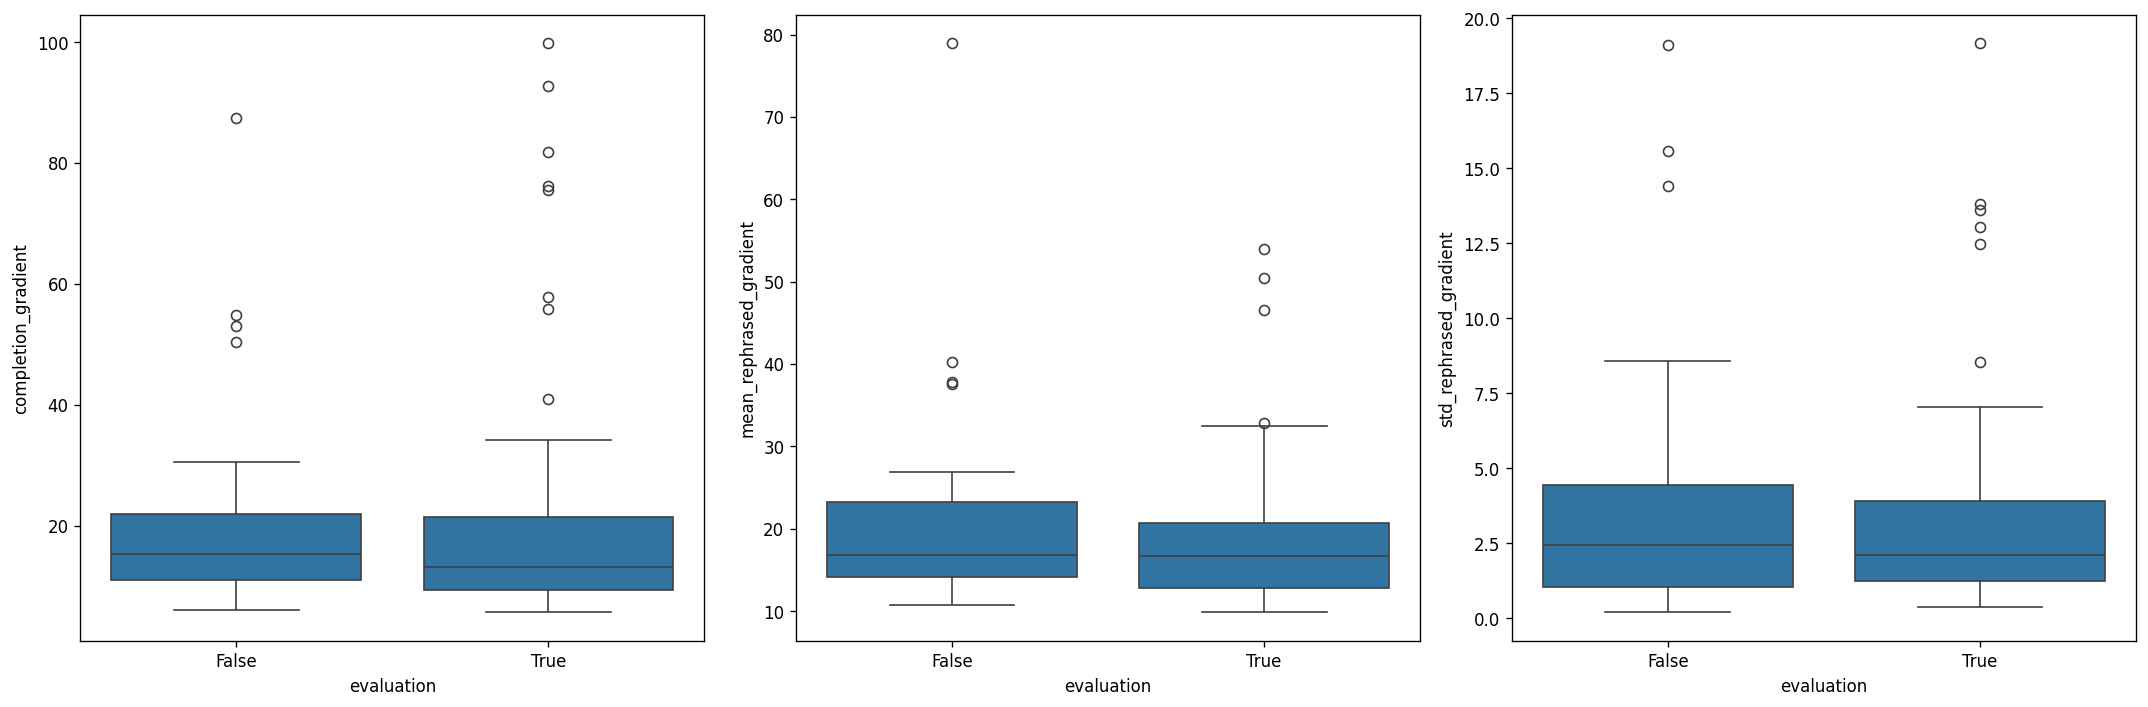

In [ ]:
plt_width = 3
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.boxplot(data=df, x="evaluation", y="completion_gradient", ax=axs[0])
sns.boxplot(data=df, x="evaluation", y="mean_rephrased_gradient", ax=axs[1])
sns.boxplot(data=df, x="evaluation", y="std_rephrased_gradient", ax=axs[2])

plt.tight_layout()

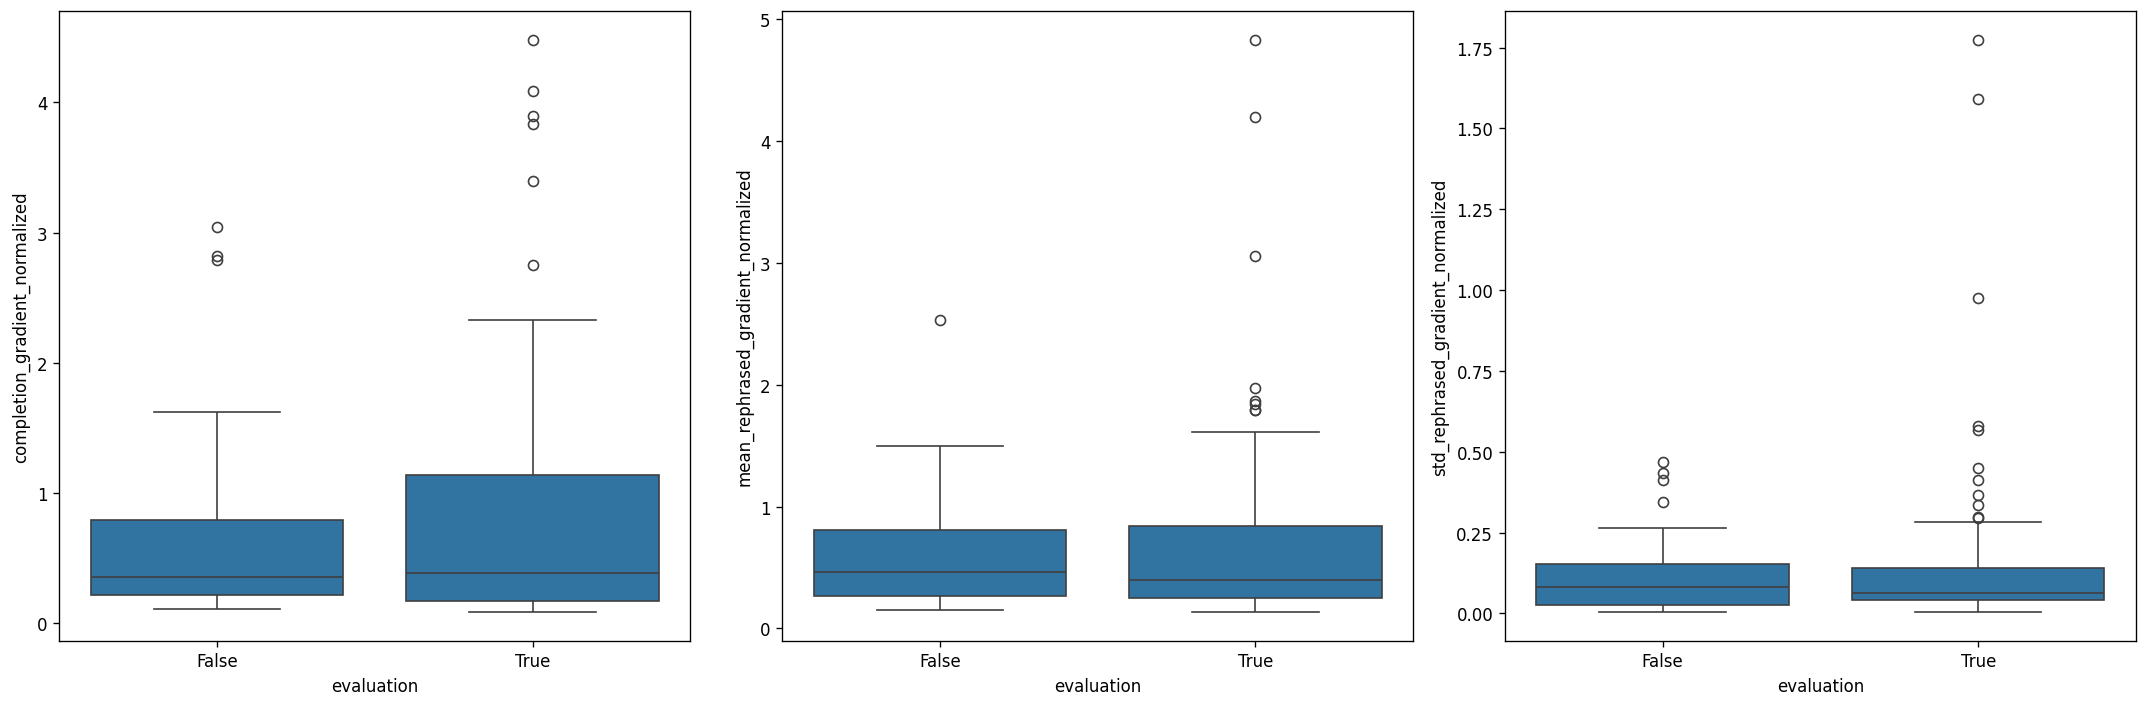

In [ ]:
plt_width = 3
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.boxplot(data=df, x="evaluation", y="completion_gradient_normalized", ax=axs[0])
sns.boxplot(data=df, x="evaluation", y="mean_rephrased_gradient_normalized", ax=axs[1])
sns.boxplot(data=df, x="evaluation", y="std_rephrased_gradient_normalized", ax=axs[2])

plt.tight_layout()

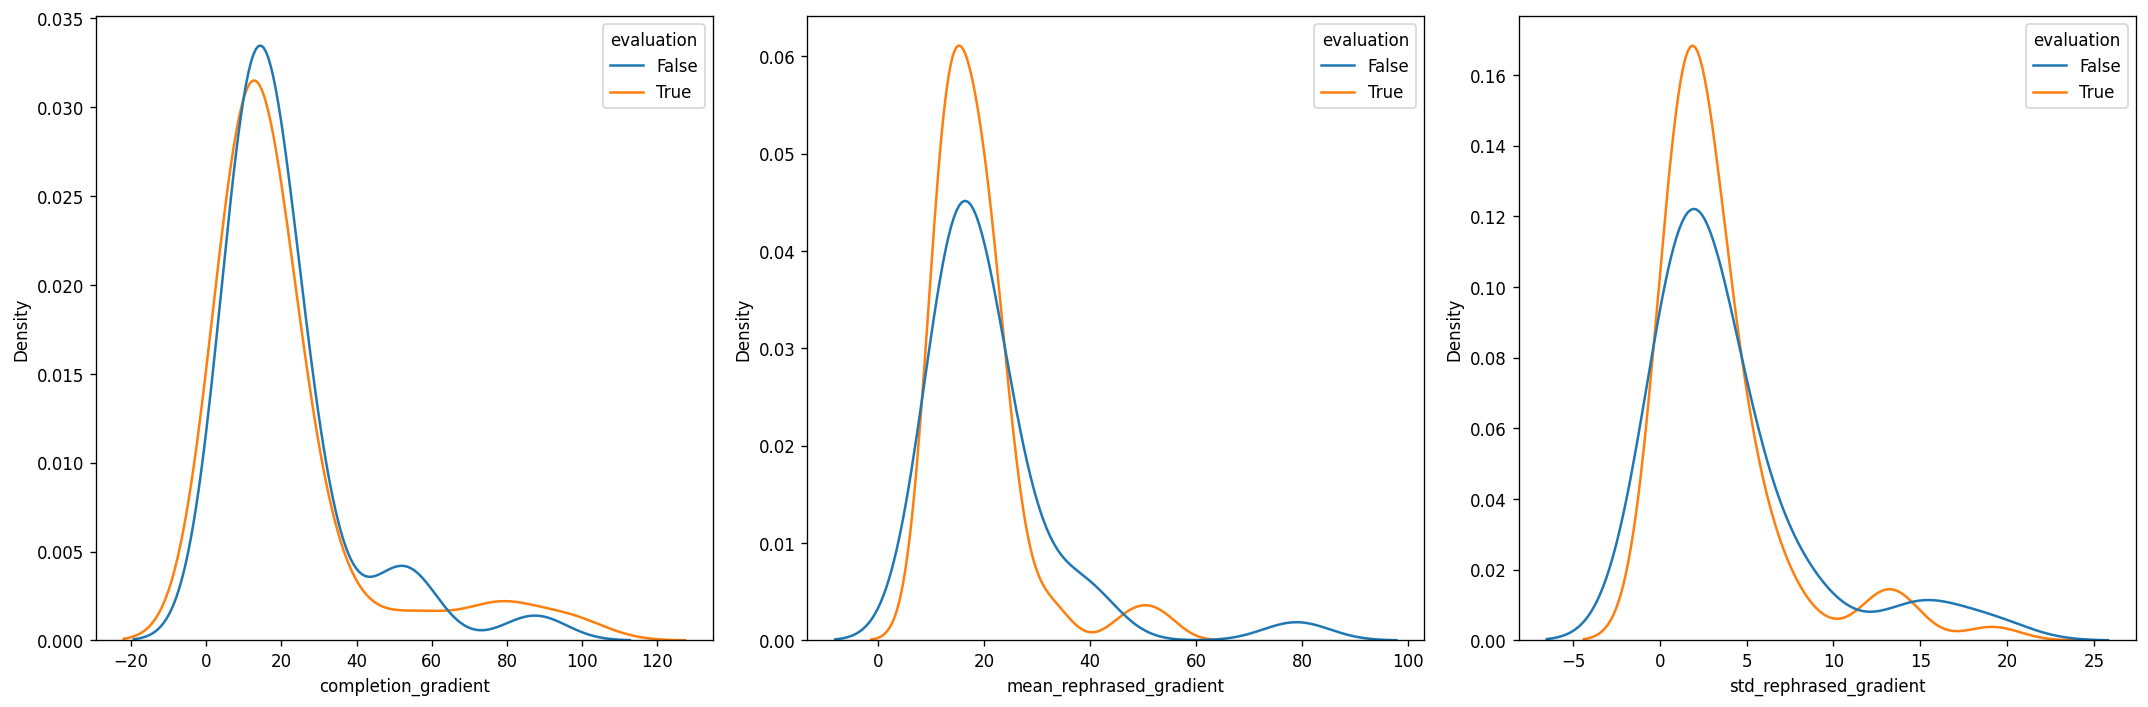

In [ ]:
plt_width = 3
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.kdeplot(data=df, x="completion_gradient", hue="evaluation", common_norm=False, ax=axs[0])
sns.kdeplot(data=df, x="mean_rephrased_gradient", hue="evaluation", common_norm=False, ax=axs[1])
sns.kdeplot(data=df, x="std_rephrased_gradient", hue="evaluation", common_norm=False, ax=axs[2])

plt.tight_layout()

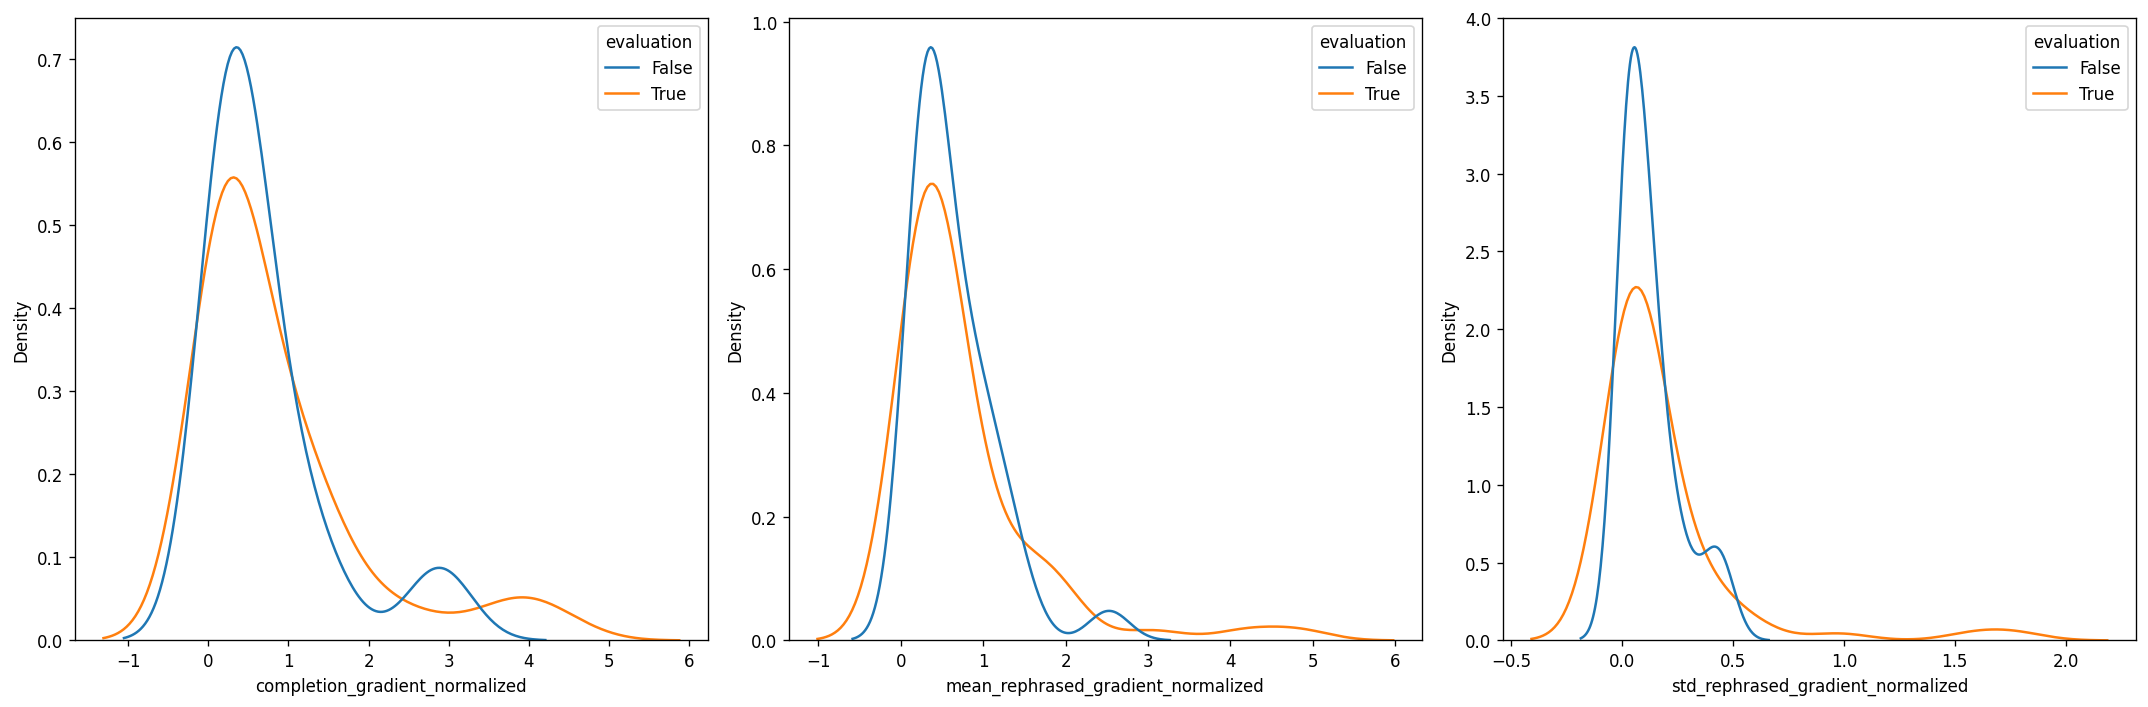

In [ ]:
plt_width = 3
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.kdeplot(data=df, x="completion_gradient_normalized", hue="evaluation", common_norm=False, ax=axs[0])
sns.kdeplot(data=df, x="mean_rephrased_gradient_normalized", hue="evaluation", common_norm=False, ax=axs[1])
sns.kdeplot(data=df, x="std_rephrased_gradient_normalized", hue="evaluation", common_norm=False, ax=axs[2])

plt.tight_layout()

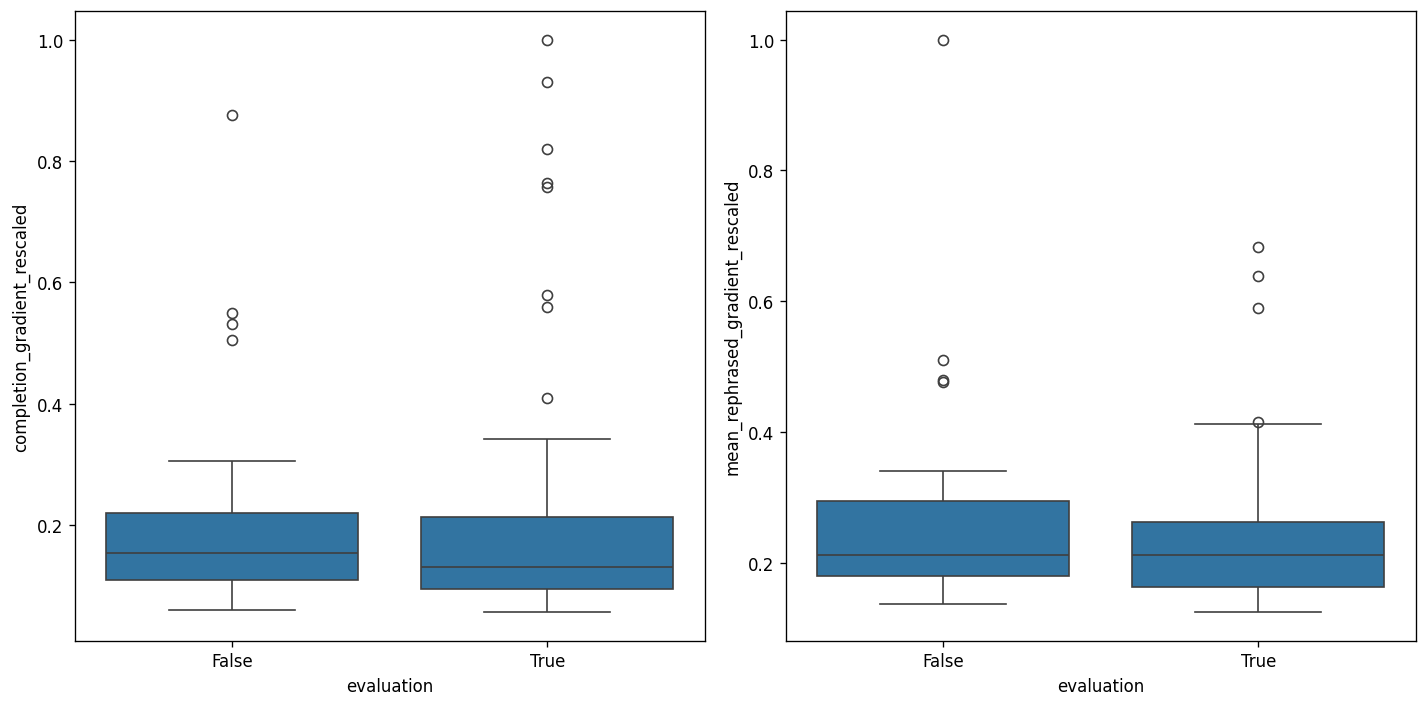

In [105]:
plt_width = 2
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.boxplot(data=df, x="evaluation", y="completion_gradient_rescaled", ax=axs[0])
sns.boxplot(data=df, x="evaluation", y="mean_rephrased_gradient_rescaled", ax=axs[1])

plt.tight_layout()

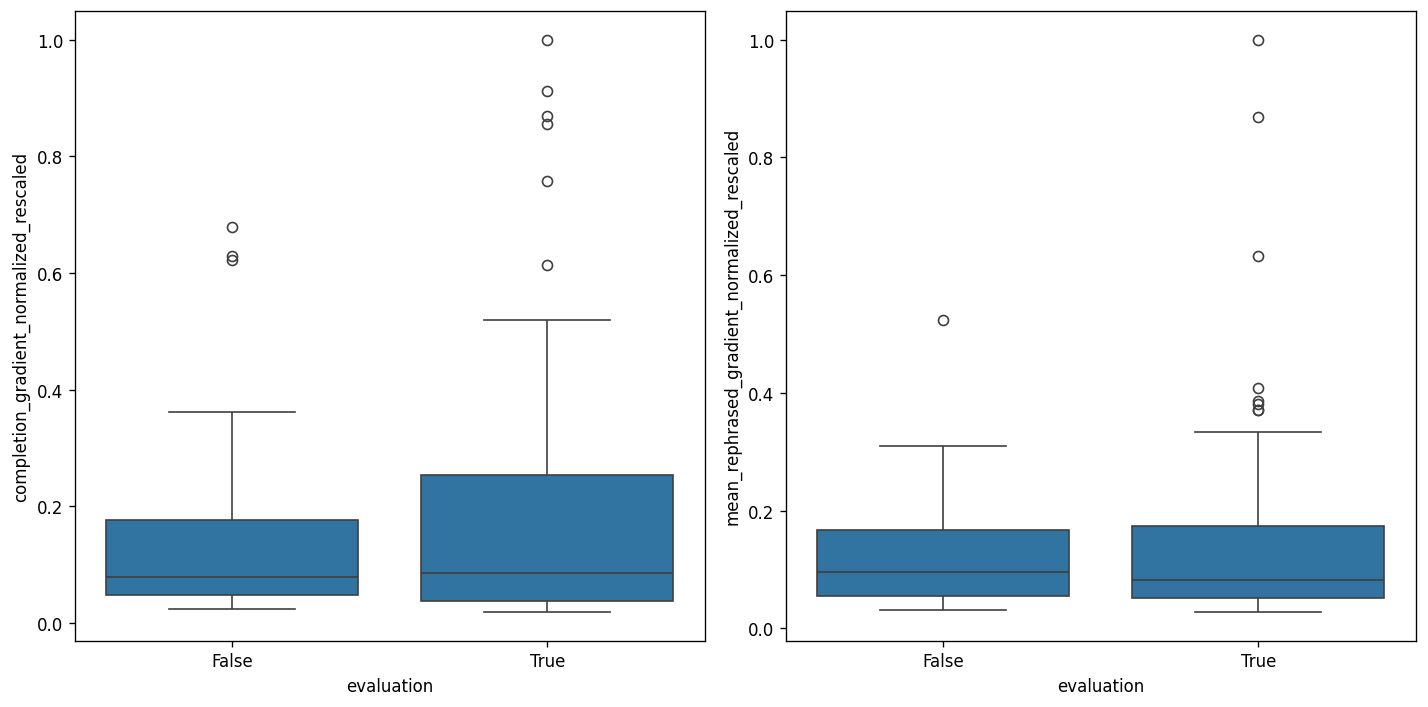

In [106]:
plt_width = 2
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.boxplot(data=df, x="evaluation", y="completion_gradient_normalized_rescaled", ax=axs[0])
sns.boxplot(data=df, x="evaluation", y="mean_rephrased_gradient_normalized_rescaled", ax=axs[1])

plt.tight_layout()

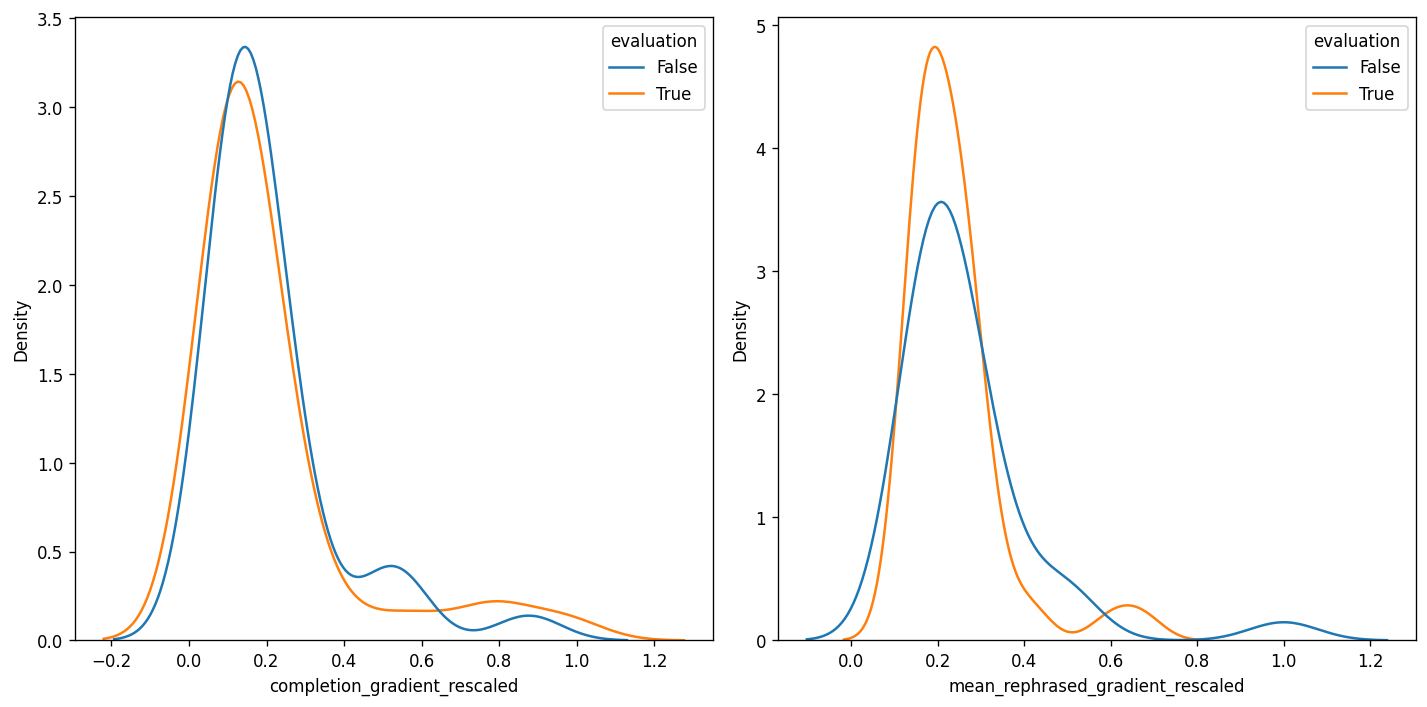

In [107]:
plt_width = 2
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.kdeplot(data=df, x="completion_gradient_rescaled", hue="evaluation", common_norm=False, ax=axs[0])
sns.kdeplot(data=df, x="mean_rephrased_gradient_rescaled", hue="evaluation", common_norm=False, ax=axs[1])

plt.tight_layout()

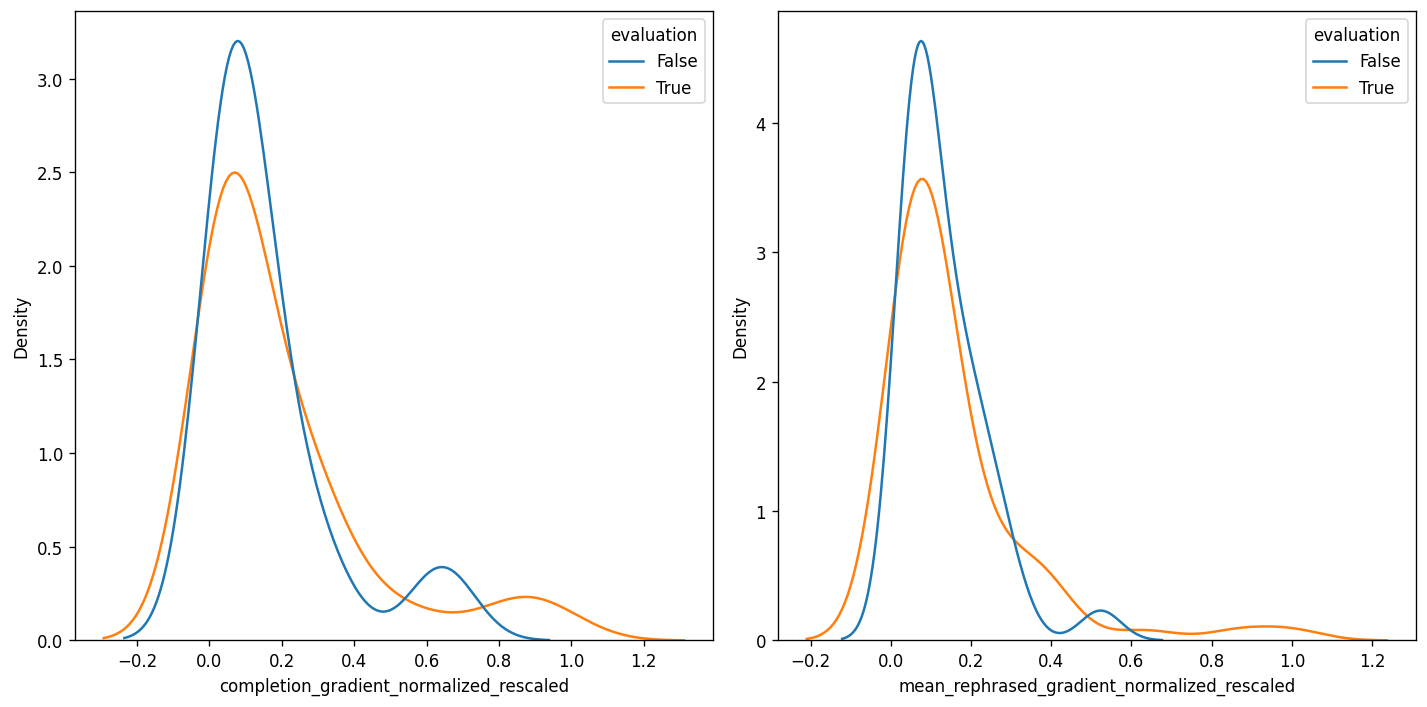

In [108]:
plt_width = 2
plt_height = 1

fig, axs = plt.subplots(
    plt_height, plt_width, figsize=(plt_width * plot_size, plt_height * plot_size)
)

sns.kdeplot(data=df, x="completion_gradient_normalized_rescaled", hue="evaluation", common_norm=False, ax=axs[0])
sns.kdeplot(data=df, x="mean_rephrased_gradient_normalized_rescaled", hue="evaluation", common_norm=False, ax=axs[1])

plt.tight_layout()